<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/main/Outlier_Removal_using_Z_score_%26_Std_Deviation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls '/content/drive/MyDrive/py-master/ML/FeatureEngineering/2_outliers_z_score/'

2_outliers_z_score.ipynb  Exercise  heights.csv  zscore.png


In [17]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df= pd.read_csv('/content/drive/MyDrive/py-master/ML/FeatureEngineering/2_outliers_z_score/heights.csv')
df.head(4)

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978


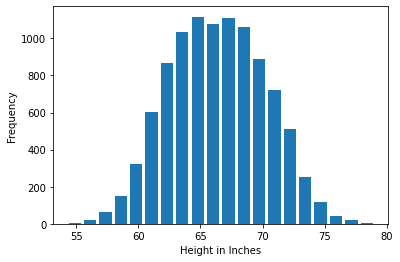

In [6]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height in Inches')
plt.ylabel('Frequency')
plt.show()

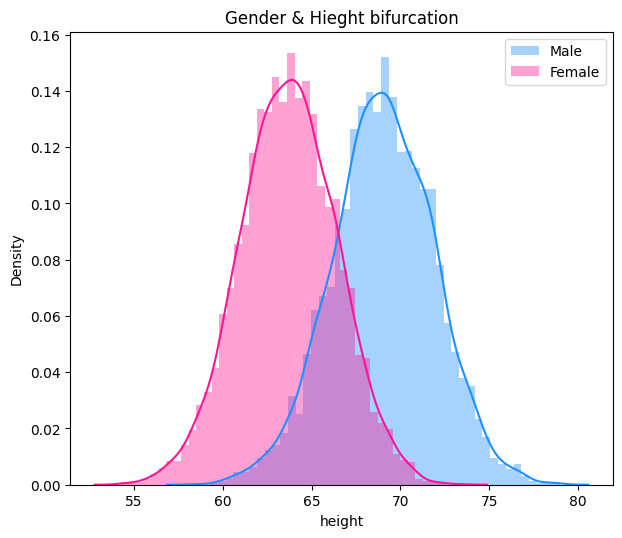

In [15]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df.loc[df.gender=='Male', 'height'] , color="dodgerblue", label="Male")
sns.distplot( df.loc[df.gender=='Female', 'height'] , color="deeppink", label="Female")
plt.title('Gender & Hieght bifurcation')
plt.legend();

Text(0, 0.5, 'Frequency')

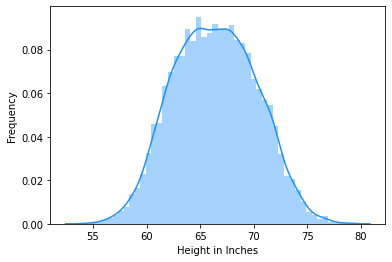

In [32]:
from scipy.stats import norm
sns.distplot( df['height'] , color="dodgerblue")
plt.xlabel('Height in Inches')
plt.ylabel('Frequency')



In [33]:
usl = df.height.mean()+3*df.height.std()
lsl = df.height.mean()-3*df.height.std()

In [35]:
usl, lsl

(77.91014411725232, 54.824975392478876)

In [36]:
df[(df.height>usl)|(df.height<lsl)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [38]:
df2= df[(df.height<usl)&(df.height>lsl)]
df2.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [42]:
df2.shape[0] # whenever you do a shape of 0 that would give you no of rows
df.shape[0]-df2.shape[0] # this gives you the difference in rows of the 2 dataset

7

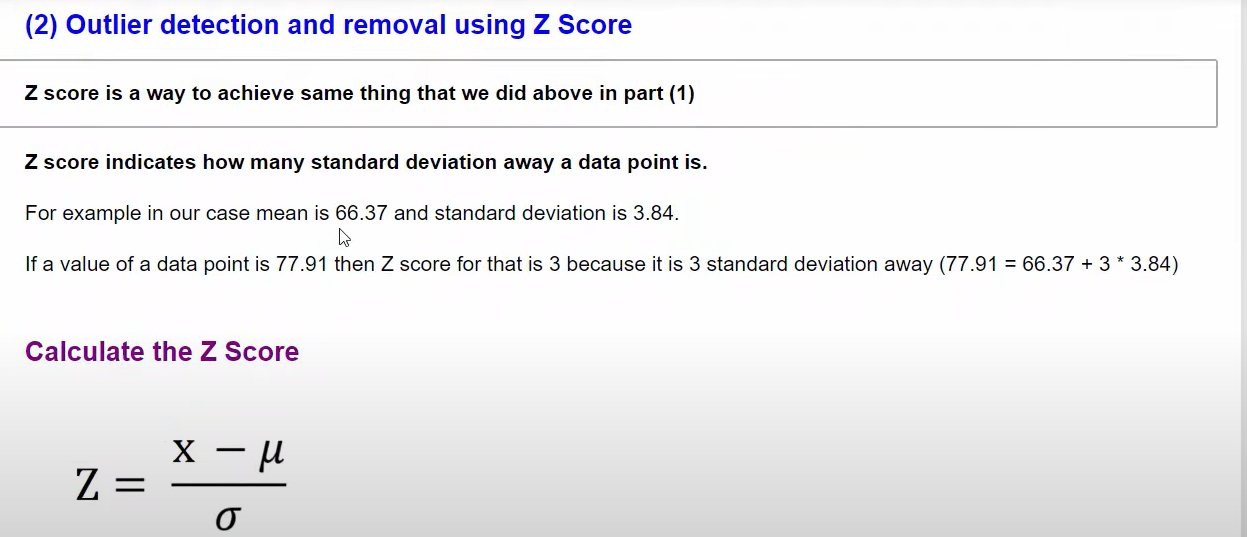

In [43]:
# Calculate Z score
df['Zscore']= ((df.height-df.height.mean())/df.height.std())

In [45]:
df.head(2)

,gender,height,Zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505


In [46]:
df2= df[(df.Zscore<3)&(df.Zscore>-3)]
df2.head()

,gender,height,Zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [48]:
df.shape[0]-df2.shape[0]

7

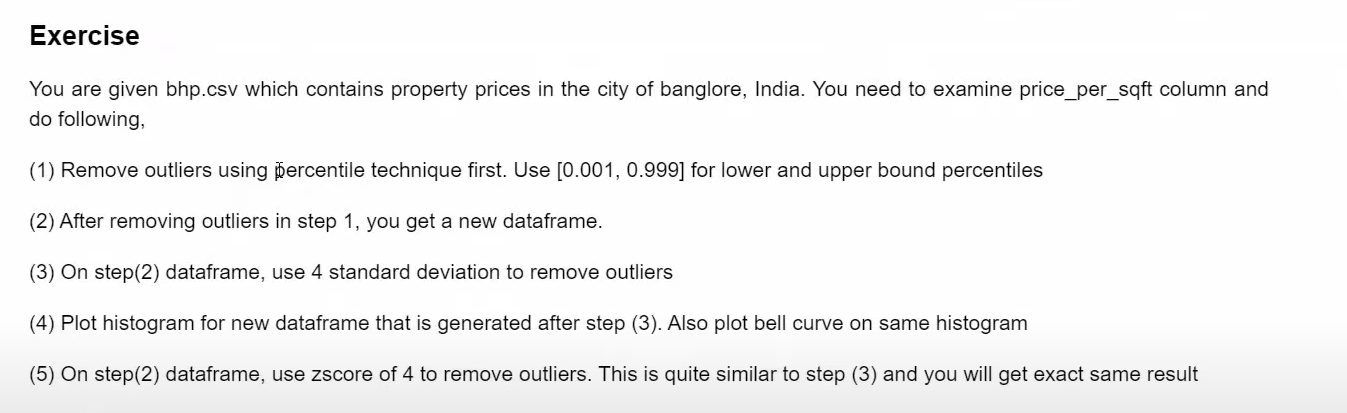